In [2]:
import fastf1 as f1
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns

In [6]:
# Constants
YEAR = 2023
NOW = datetime.now()

# Enable cache
f1.Cache.enable_cache("fastf1_cache")

# Team Colors
color_map = {
 'alfa romeo': '#900000', 
 'alphatauri': '#2b4562', 
 'alpine': '#0090ff', 
 'aston martin': '#006f62', 
 'ferrari': '#dc0000', 
 'haas f1 team': '#ffffff', 
 'mclaren': '#ff8700', 
 'mercedes': '#00d2be', 
 'red bull racing': '#0600ef', 
 'williams': '#005aff'
 }

In [7]:
calendar = f1.get_event_schedule(year=YEAR)

In [8]:
NOW.year

2023

In [9]:
next_event = calendar[calendar["EventDate"] > NOW].reset_index(drop=True).loc[0,:]

In [10]:
sesh = f1.get_testing_session(year=YEAR, test_number=1, session_number=1)

In [11]:
# Load data
sesh.load()

core           INFO 	Loading data for Pre-Season Testing - Practice 1 [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
c:\Users\Kyle\Documents\Projects\Data Projects\f1\.venv\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
c:\Users\Kyle\Documents\Projects\Data Projects\f1\.venv\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
c:\Users\Kyle\Documents\Projects\Data Projects\f1\.venv\Lib\site-packages\fastf1\core.py:1415: FutureWarning: In a fu

In [13]:
driver_numbers = sesh.laps.DriverNumber.unique()

In [14]:
fastest = pd.DataFrame()
for d in driver_numbers:
    fastest = pd.concat([fastest, sesh.laps[sesh.laps["DriverNumber"] == d].pick_fastest().to_frame().T], axis=0)

In [15]:
sesh.laps["LapTime"] = sesh.laps["LapTime"] / np.timedelta64(1, "s")

In [101]:
teams_by_median = sesh.laps.groupby(["Driver", "Team"])["LapTime"].median().sort_values().index.get_level_values("Team").tolist()
drivers_by_median = sesh.laps.groupby(["Driver", "Team"])["LapTime"].median().sort_values().index.get_level_values("Driver").tolist()

teams_lower = [x.lower() for x in teams_by_median]

# Order list of colors same as list of teams
colors = []
for x in teams_lower:
    colors.append(color_map[x])

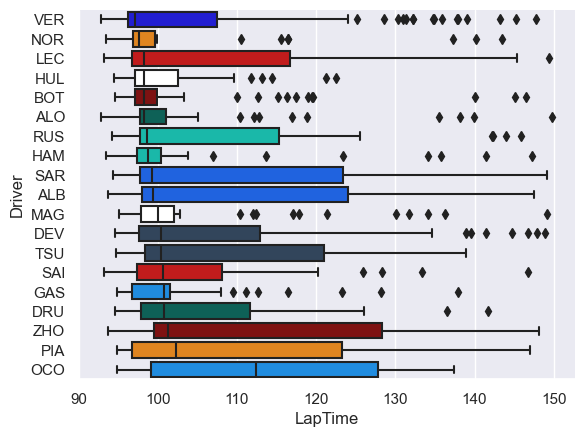

In [102]:
sns.set_theme()

sns.boxplot(data = sesh.laps, y = "Driver", x = "LapTime", orient="h", order=drivers_by_median, palette=colors)

sns.despine()

In [75]:
teams_by_median = sesh.laps.groupby("Team")["LapTime"].median().sort_values().index.tolist()

teams_by_min = sesh.laps.groupby("Team")["LapTime"].min().sort_values().index.tolist()

In [76]:
teams_lower = [x.lower() for x in teams_by_median]

In [77]:
# Order list of colors same as list of teams
colors = []
for x in teams_lower:
    colors.append(color_map[x])

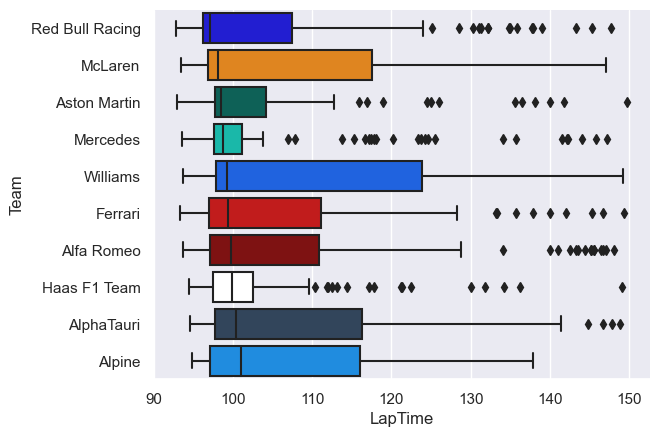

In [81]:
sns.set_theme()

sns.boxplot(data = sesh.laps, y = "Team", x = "LapTime", orient="h", order=teams_by_median, palette=colors)

sns.despine()